# Meteorological Calculations Examples

This notebook demonstrates the usage of the meteorological calculation library for common atmospheric physics calculations.


## Setup and Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from micromet.meteolib import MeteoCalculator
import pandas as pd

# Create calculator instance
calc = MeteoCalculator()

## 1. Basic Vapor Pressure Calculations

### 1.1 Saturation Vapor Pressure

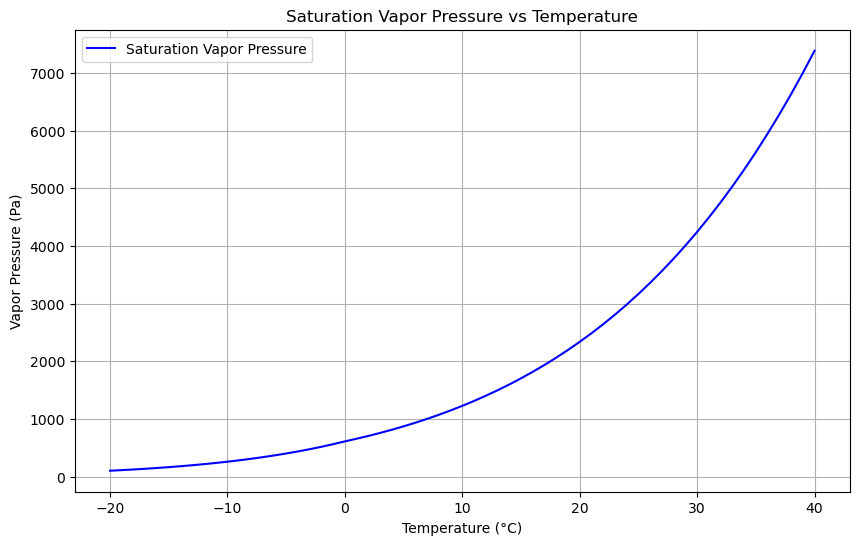

Saturation Vapor Pressure at:
0°C: 611.2 Pa
20°C: 2337.3 Pa
30°C: 4243.5 Pa


In [4]:
# Calculate saturation vapor pressure at different temperatures
temps = np.linspace(-20, 40, 61)
es = calc.saturation_vapor_pressure(temps)

plt.figure(figsize=(10, 6))
plt.plot(temps, es, 'b-', label='Saturation Vapor Pressure')
plt.xlabel('Temperature (°C)')
plt.ylabel('Vapor Pressure (Pa)')
plt.title('Saturation Vapor Pressure vs Temperature')
plt.grid(True)
plt.legend()
plt.show()

# Example values at key temperatures
print("Saturation Vapor Pressure at:")
for t in [0, 20, 30]:
    es = calc.saturation_vapor_pressure(t)
    print(f"{t}°C: {es:.1f} Pa")

### 1.2 Actual Vapor Pressure

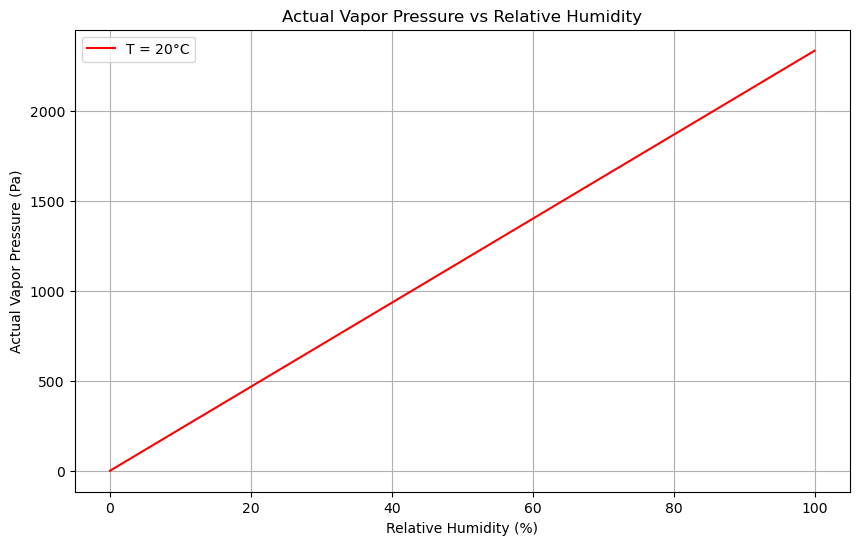

In [5]:
# Calculate actual vapor pressure at fixed temperature with varying RH
temp = 20
rh_values = np.linspace(0, 100, 11)
ea = calc.actual_vapor_pressure(temp, rh_values)

plt.figure(figsize=(10, 6))
plt.plot(rh_values, ea, 'r-', label=f'T = {temp}°C')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Actual Vapor Pressure (Pa)')
plt.title('Actual Vapor Pressure vs Relative Humidity')
plt.grid(True)
plt.legend()
plt.show()

## 2. Air Properties

### 2.1 Air Density

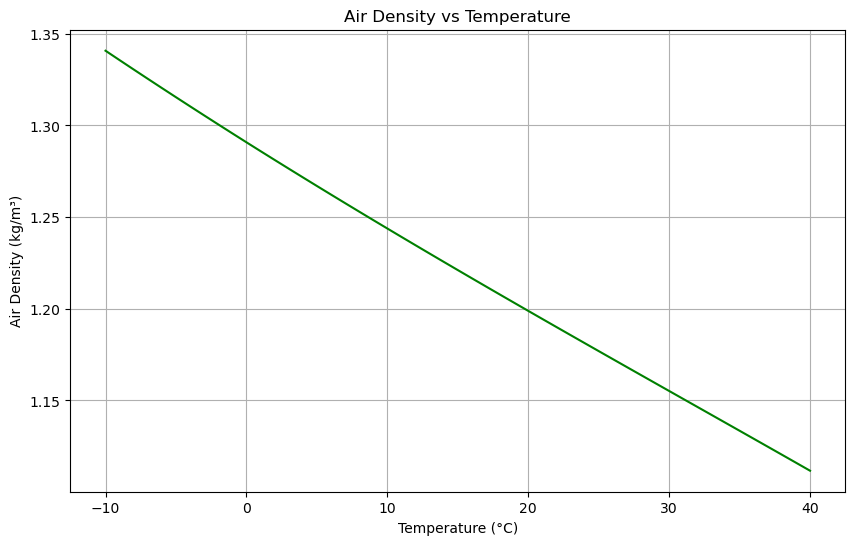

In [6]:
# Calculate air density variation with temperature
temps = np.linspace(-10, 40, 51)
rh = 50  # constant RH
pressure = 101325  # standard pressure

rho = calc.air_density(temps, rh, pressure)

plt.figure(figsize=(10, 6))
plt.plot(temps, rho, 'g-')
plt.xlabel('Temperature (°C)')
plt.ylabel('Air Density (kg/m³)')
plt.title('Air Density vs Temperature')
plt.grid(True)
plt.show()

### 2.2 Psychrometric Constant

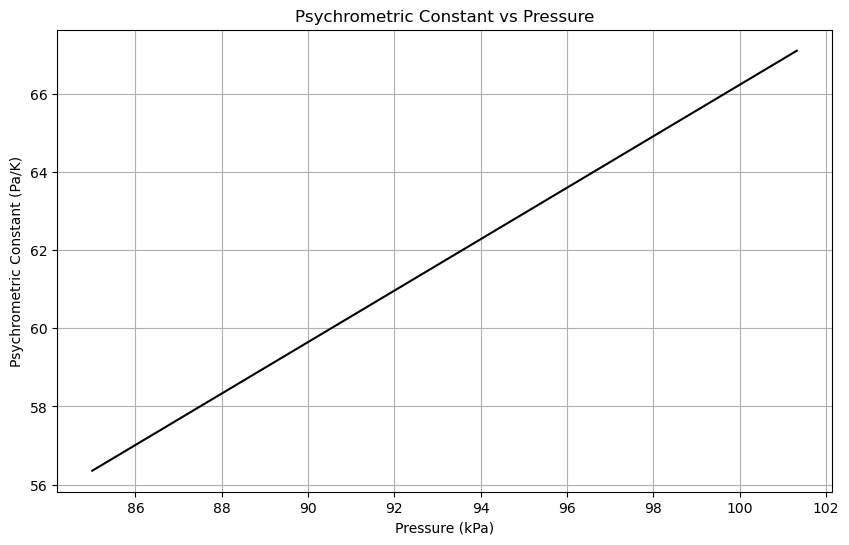

In [7]:
# Calculate psychrometric constant at different pressures
pressures = np.linspace(85000, 101325, 50)
temp = 20
rh = 50

gamma = calc.psychrometric_constant(temp, rh, pressures)

plt.figure(figsize=(10, 6))
plt.plot(pressures/1000, gamma, 'k-')
plt.xlabel('Pressure (kPa)')
plt.ylabel('Psychrometric Constant (Pa/K)')
plt.title('Psychrometric Constant vs Pressure')
plt.grid(True)
plt.show()

## 3. Solar Calculations

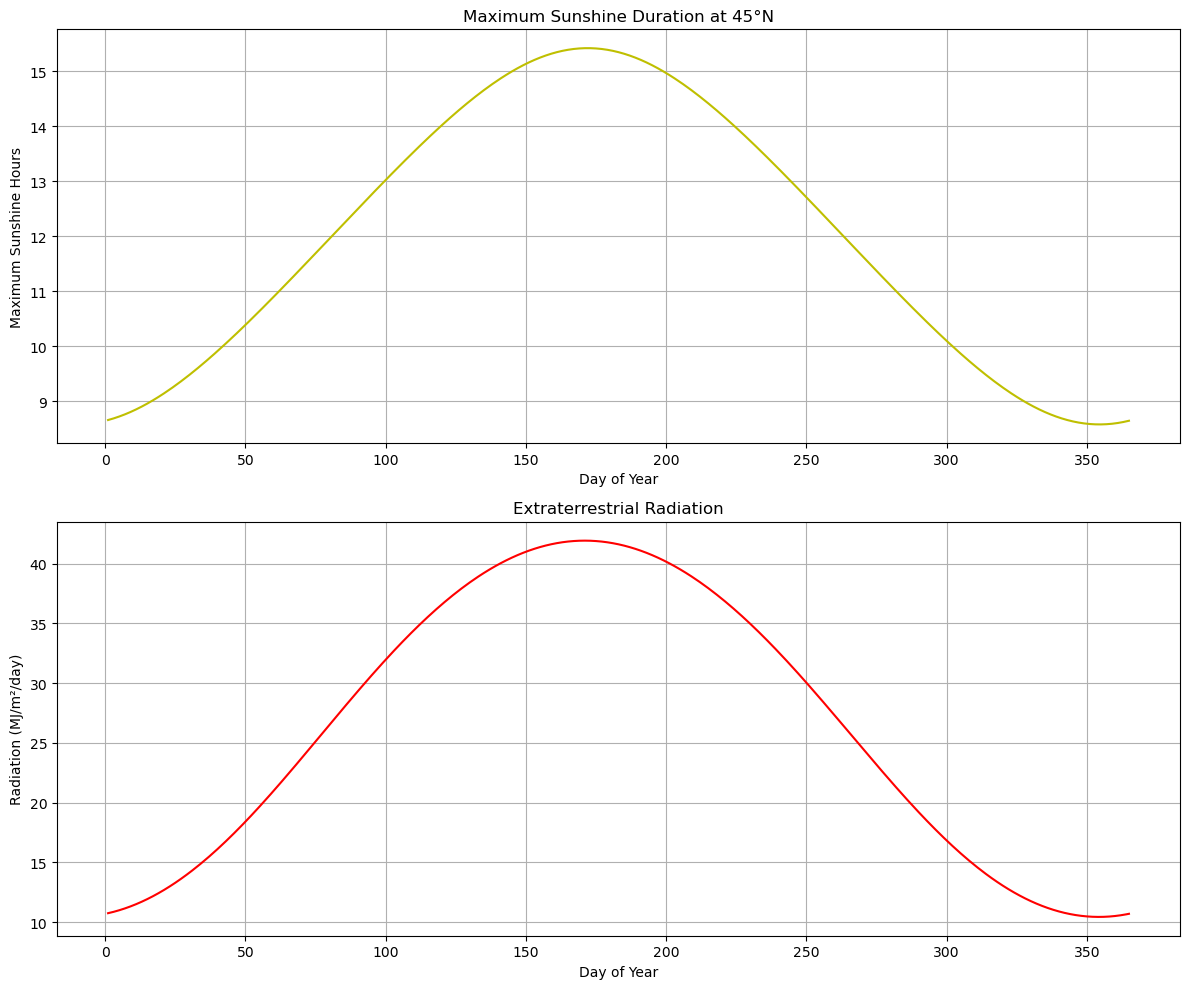

In [8]:
# Calculate solar parameters throughout the year
days = np.arange(1, 366)
lat = 45  # Northern hemisphere mid-latitude

solar = calc.solar_parameters(days, lat)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot maximum sunshine hours
ax1.plot(days, solar.max_sunshine_hours, 'y-')
ax1.set_xlabel('Day of Year')
ax1.set_ylabel('Maximum Sunshine Hours')
ax1.set_title(f'Maximum Sunshine Duration at {lat}°N')
ax1.grid(True)

# Plot extraterrestrial radiation
ax2.plot(days, solar.extraterrestrial_radiation/1e6, 'r-')
ax2.set_xlabel('Day of Year')
ax2.set_ylabel('Radiation (MJ/m²/day)')
ax2.set_title('Extraterrestrial Radiation')
ax2.grid(True)

plt.tight_layout()
plt.show()

## 4. Real Data Example

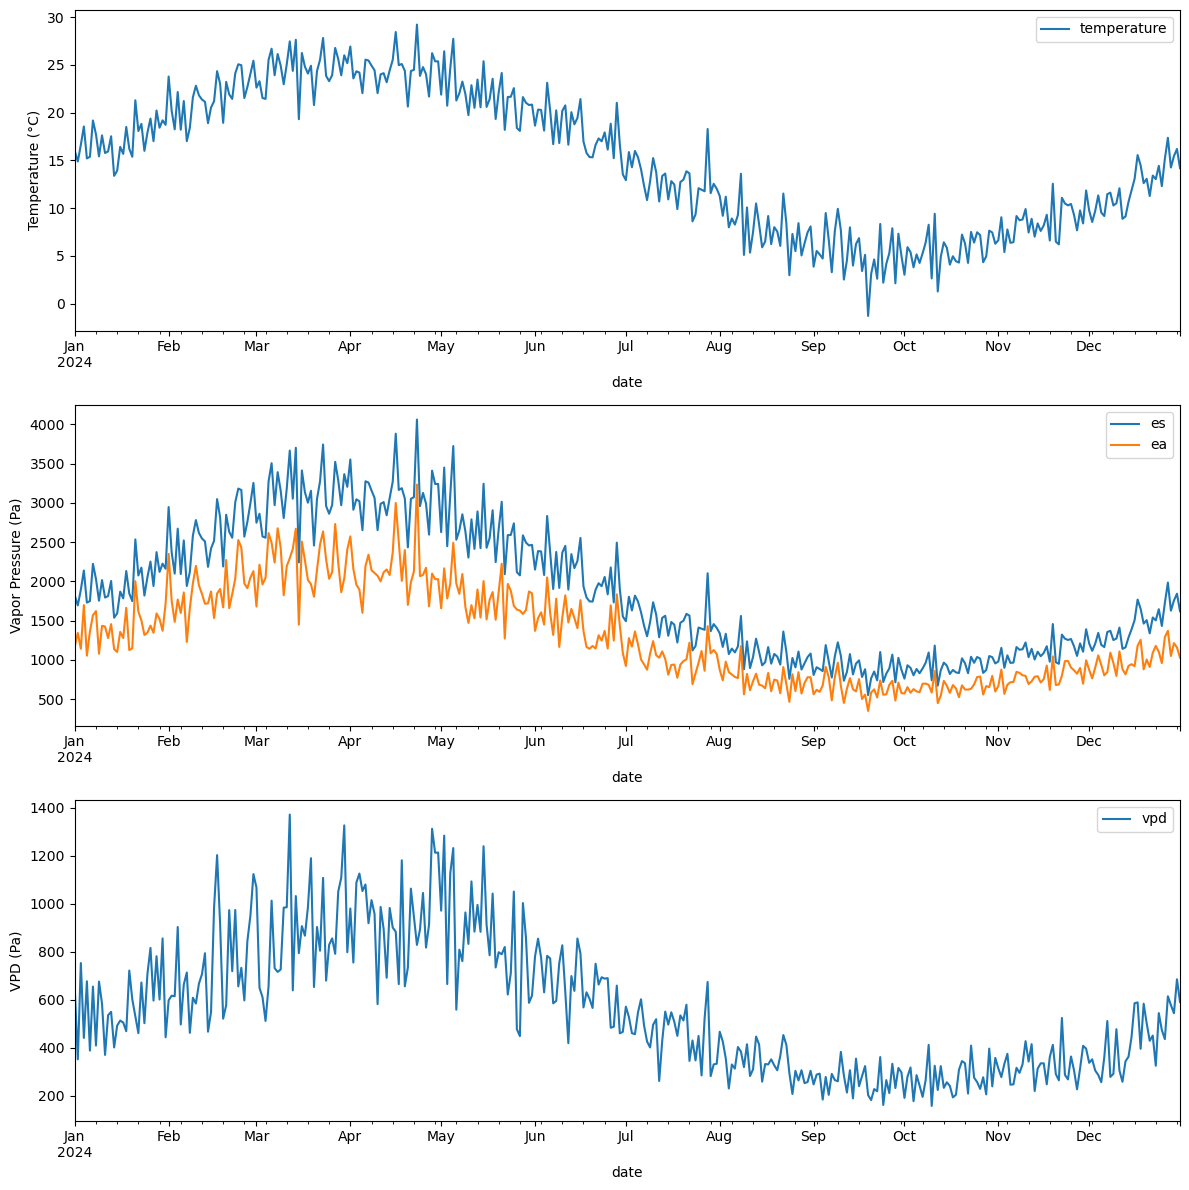

In [9]:
# Create sample daily weather data
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
np.random.seed(42)

# Generate synthetic weather data
weather_data = pd.DataFrame({
    'date': dates,
    'temperature': 15 + 10*np.sin(2*np.pi*np.arange(len(dates))/365) + np.random.normal(0, 2, len(dates)),
    'rh': 60 + 20*np.random.random(len(dates)),
    'pressure': 101325 + 1000*np.random.random(len(dates))
})

# Calculate derived quantities
weather_data['es'] = calc.saturation_vapor_pressure(weather_data['temperature'])
weather_data['ea'] = calc.actual_vapor_pressure(weather_data['temperature'], weather_data['rh'])
weather_data['vpd'] = weather_data['es'] - weather_data['ea']

# Plot results
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

weather_data.plot(x='date', y='temperature', ax=axes[0])
axes[0].set_ylabel('Temperature (°C)')

weather_data.plot(x='date', y=['es', 'ea'], ax=axes[1])
axes[1].set_ylabel('Vapor Pressure (Pa)')

weather_data.plot(x='date', y='vpd', ax=axes[2])
axes[2].set_ylabel('VPD (Pa)')

plt.tight_layout()
plt.show()

## 5. Wind Vector Analysis

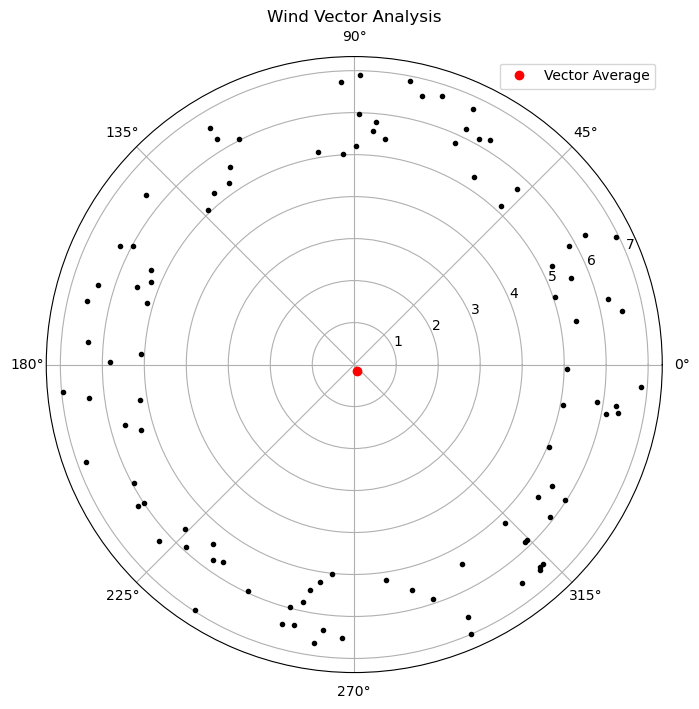

Vector average speed: 0.2 m/s
Vector average direction: 297.3°


In [10]:
# Generate sample wind data
wind_speed = 5 + 2*np.random.random(100)
wind_dir = np.random.uniform(0, 360, 100)

# Calculate vector average
speed, direction = calc.wind_vector(wind_speed, wind_dir)

# Create wind rose plot
plt.figure(figsize=(8, 8))
plt.polar(np.radians(wind_dir), wind_speed, 'k.')
plt.polar(np.radians([direction]), [speed], 'ro', label='Vector Average')
plt.title('Wind Vector Analysis')
plt.legend()
plt.show()

print(f"Vector average speed: {speed:.1f} m/s")
print(f"Vector average direction: {direction:.1f}°")

## 6. Error Handling Example

In [11]:
# Demonstrate error handling for invalid inputs
try:
    # Try invalid temperature
    calc.saturation_vapor_pressure(-300)
except Exception as e:
    print(f"Invalid temperature error: {e}")

try:
    # Try invalid humidity
    calc.actual_vapor_pressure(20, 150)
except Exception as e:
    print(f"Invalid humidity error: {e}")

try:
    # Try invalid pressure
    calc.air_density(20, 50, -1000)
except Exception as e:
    print(f"Invalid pressure error: {e}")

Invalid humidity error: Relative humidity must be between 0-100%


C:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\micromet\meteolib.py:188: UserWarning: Temperature -300°C is outside recommended range (-80 to 50°C). Results may be inaccurate.
  warnings.warn(
